# AIRBNB - PREDICTING RENTAL PRICES IN SYDNEY
This statistical project aims to explore the key factors that affect the rental prices of properties, which are listed on Airbnb, in Sydney and apply multiple fundamental machine learning models to predict the future price on the data collected. The models we used are multitple linear regression, gradient descent regression, ridge regression, descision tree regression and random forest.

The data description: The data set I used in this project is called the 'listing' dataset, which is released on July 10th 2019, and being publicly available on Inside Airbnb website. <br>
_ URL (Inside Airbnb): http://insideairbnb.com/ <br>
_ Description: 106 columns and 38080 rows. <br>
_ Date released: July 10th 2019 <br>

In this project, there are four main stages: (1) preprocessing data, (2) exploratory data analysis, (3) model training, prediction and evaluation, and (4) result interpretations. 

## Stage 1: Preprocessing Data
_ First we import necessary libraries for later use and dataset to be processed:

In [2]:
''' STAGE 1: DATA PREPROCESSING '''
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load listing airbnb dataset
listing = pd.read_csv('D:/Data/Airbnb/2019-7-10/listings.csv')

_ We would like to adjust the viewing option of dataframe-type output as follow:

In [4]:
# Adjust the data view setting to check full data
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

_ Let's take a quick look over summary statistics of features in dataset. Notice here, categorical features and features with missing values will show *NaN* value:

In [4]:
# Describe data
print(listing.shape)  # dimension of data
pd.DataFrame(listing.describe()).iloc[1:,:]  # summary statistics of data

(38080, 106)


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
mean,2.097697e+07,2.019071e+13,NaN,NaN,NaN,7.601631e+07,NaN,8.749146,8.749146,NaN,-33.863353,151.201393,3.379097,1.355116,1.578288,1.992559,411.540426,1.582090,5.061607,674.432799,4.773503,5.490467,670.512763,676.760714,5.114772,674.109546,9.231014,20.414391,32.406040,98.570116,14.224396,6.087920,93.397927,9.558776,9.240762,9.721237,9.727908,9.688310,9.337193,NaN,7.111607,6.160530,0.825683,0.125394,1.066553
std,9.911534e+06,9.828254e+00,NaN,NaN,NaN,7.480652e+07,NaN,30.589590,30.589590,NaN,0.071700,0.086381,2.214248,0.705304,1.091318,1.500082,1592.210387,1.345698,17.330603,537.037859,16.827288,17.627624,541.742789,567.909961,17.172611,561.968490,11.580889,23.907620,36.491381,123.992928,33.382845,13.284103,10.008268,0.967222,1.237218,0.815887,0.831920,0.745695,1.044199,NaN,23.848201,23.909934,1.879109,1.383085,1.473645
min,1.115600e+04,2.019071e+13,NaN,NaN,NaN,1.289400e+04,NaN,0.000000,0.000000,NaN,-34.135210,150.601470,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.334910e+07,2.019071e+13,NaN,NaN,NaN,1.573907e+07,NaN,1.000000,1.000000,NaN,-33.898470,151.178117,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,30.000000,1.000000,2.000000,30.000000,30.000000,1.100000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000
50%,2.187017e+07,2.019071e+13,NaN,NaN,NaN,4.676120e+07,NaN,1.000000,1.000000,NaN,-33.882030,151.214630,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,2.000000,1125.000000,0.000000,5.000000,10.000000,37.000000,2.000000,1.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
75%,2.999565e+07,2.019071e+13,NaN,NaN,NaN,1.220192e+08,NaN,3.000000,3.000000,NaN,-33.831538,151.260112,4.000000,1.500000,2.000000,2.000000,382.000000,2.000000,5.000000,1125.000000,5.000000,5.000000,1125.000000,1125.000000,5.000000,1125.000000,21.000000,45.000000,72.000000,174.000000,11.000000,5.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,1.410000
max,3.656555e+07,2.019071e+13,NaN,NaN,NaN,2.747278e+08,NaN,438.000000,438.000000,NaN,-33.389730,151.339870,16.000000,18.000000,46.000000,29.000000,21528.000000,16.000000,1000.000000,10000.000000,1000.000000,1000.000000,10000.000000,10000.000000,1000.000000,10000.000000,30.000000,60.000000,90.000000,365.000000,576.000000,272.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,197.000000,197.000000,21.000000,26.000000,29.780000


_ We will check the percentage of missing values contained in each feature.

In [5]:
## 1.1 Detecting Missing Data
nrow = listing.shape[0]  # row dimension
ncol = listing.shape[1]  # column dimension
missfrq = listing.isnull().sum()/nrow  # returns frequency(in proportion)of missing values of each features
missfrq = pd.DataFrame(missfrq)   # transform into dataframe
missfrq = missfrq.rename(columns = {0:'Frequency'})  # add 'frequency' name to column
pd.DataFrame(missfrq).head(10)

,Frequency
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
name,0.000341
summary,0.034769
space,0.299501
description,0.021586
experiences_offered,0.000000
neighborhood_overview,0.384506


_ The table above is a summary of missing values frequencies of every feature in the data. Below we will extract the high missing value rate (> 10%) and drop them.

In [6]:
# Detect features with missing values frequency > 0.1
misshigh = missfrq[missfrq['Frequency']>0.1].copy()  # Select those frequency value > 0.1
pd.DataFrame(misshigh).head(10)   # Show the first 10 rows

,Frequency
space,0.299501
neighborhood_overview,0.384506
notes,0.590678
transit,0.376654
access,0.423293
interaction,0.420273
house_rules,0.415966
thumbnail_url,1.000000
medium_url,1.000000
xl_picture_url,1.000000


_ Now, we will drop features that have high frequency values.

In [7]:
# Remove all features have missing values frequency > 0.1
VarDrop = misshigh.index   # store the names of features to be dropped
listing = listing.drop(VarDrop, axis = 1)  # drop features that have high missing values frequency
print(listing.shape)   # current dimension of dataset

(38080, 72)


_ Next, we will impute missing values for the remaining features in the data: We will first subset the features that have missing values rate > 0% and < 10% from the *missfrq* table above, and then consider keeping only useful features.

In [8]:
## (1.2) Impute Missing values for remaining features in listing
# Subset features that have missing values proportion less than 10%: 
missImpute = missfrq[missfrq['Frequency'] != 0].copy()
missImpute = missImpute[missImpute['Frequency'] <= 0.1]  # Select those features with missing values frequency < 0.1
pd.DataFrame(missImpute)

,Frequency
name,0.000341
summary,0.034769
description,0.021586
host_name,0.000683
host_since,0.000683
host_location,0.001891
host_is_superhost,0.000683
host_thumbnail_url,0.000683
host_picture_url,0.000683
host_listings_count,0.000683


_ As there are many unnecessary features that can complicate the analysis, so we will remove all of them. 

In [9]:
'''There are some unnecessary features such as host_thumbnail_url, host_picture_url, city (all ready have zipcode),
state (all NSW). We will remove these features.
'''
drop = ['host_thumbnail_url','host_picture_url','city','state','host_location','host_since','summary','description',
        'market','name','host_name','zipcode']
listing = listing.drop(drop,axis = 1)
missImpute = missImpute.drop(drop,axis=0)

_ Next is to separate the continuous features and categorical features that have missing data.

In [10]:
''' We want to separate continuous and categorical features for missing values imputation.
    Notice that pd.data.describe() only works for continous variable. So we can subset feature names based on this output
    dataframe
'''
missing = listing[missImpute.index].copy()  # Subset out missing features
contmiss = missing.describe().columns.values  # Get continuous features with missing values
catemiss = missImpute.drop(contmiss,axis=0).index.values  # Get categorical features with missing values

In [11]:
# Check features
print(contmiss)
print(catemiss)

['host_listings_count' 'host_total_listings_count' 'bathrooms' 'bedrooms'
 'beds']
['host_is_superhost' 'host_has_profile_pic' 'host_identity_verified'
 'cancellation_policy']


_ As the mean is easily influenced by large values in the data and hence sometimes results in misleading, it is not recommended for imputation. The median is more robust in measuring central of tendency but this may not represent a major proportion of the data values. We want to impute missing values with some appropriate data that might not change the characteristics in the data. As the proportions of missing data of all considered features are less than 10%, so using the mode value for imputation could be appropriate (for both continuous and categorical features).  

In [12]:
# Impute missing values for continuous features with their mode values
for word in contmiss:
    listing[word] = listing[word].fillna(listing[word].mode()[0])
# Impute missing values for categorical features with their mode value
import operator
for word in catemiss:
    mode = max(dict(listing[word].value_counts()).items(), key=operator.itemgetter(1))[0]
    listing[word] = listing[word].fillna(value = mode)

_ Next, we will check to see whether there is any duplicated data. Notice that one listing's 'id' can have many 'host_id' because one owner may have many properties for rent. But duplication for array value [ 'id' , 'host_id' ] might be in check.

In [13]:
listing.isnull().sum().unique()  # Check to see whether there are any features with missing data

array([0], dtype=int64)

In [14]:
## (1.3) Checking for duplication
listing.duplicated(['id','host_id']).unique()  # No duplication

array([False])

In [15]:
listing.duplicated(['id']).unique()  # No duplication

array([False])

In [16]:
listing.duplicated(['host_id']).unique()  # There are duplications but it doesn't matter because one host can have more than 
                                 # 1 property

array([False,  True])

In [28]:
listing.duplicated().unique()  # there is no exact duplicate of row

array([False])

_ Some other features adjustments will be made for easier modelling later on:

In [17]:
## (1.4) Text feature adjustments and redundant features remove
# Remove redundant features
dropvar = ['listing_url','scrape_id','last_scraped','experiences_offered','picture_url','host_url','calendar_last_scraped',
          'calendar_last_scraped','street','smart_location','id','host_id','country_code','country', 
          'amenities','host_verifications']

_ As we will see below the two features "street" and "smart_location" referring to the same location. So we will drop one feature while remaining the other. As in our example, we will drop "street" (which has been included on the "dropvar" above. 

In [18]:
# Store 'street' feature in a variable
street = listing['street'].copy()

In [19]:
# Keep only names of suburbs of NSW and ignore the term 'NSM, Australia'
for i in range(nrow):
    street[i] = street[i].split(",")[0]

In [20]:
# Store 'smart_location' in a variable
smart_location = listing['smart_location'].copy()

In [21]:
# Keep only names of suburbs of NSW and ignore the term 'NSM, Australia'
for i in range(nrow):
    smart_location[i] = smart_location[i].split(",")[0]

In [22]:
'''
We notice below here is that 'smart_location' and 'street' are identical. So we will drop 'street' and keep the
 'smart_location' for analysis. 
'''
(smart_location == street).unique() # as these two features are idential we will remove one of them (should be 'street')

array([ True])

In [23]:
listing = listing.drop(dropvar,axis = 1)

In [24]:
# Store adjusted features in listing dataset
listing['smart_location'] = smart_location

We can export out cleansed data into a CSV file for stage 2 analysis.

In [26]:
listing.to_csv("D:/Data/Airbnb/cleansed_listing.csv")

## Stage 2: Exploratory Data Analysis - Data Featuring, Analysis, Visualization and Dashboard
In this stage, we will conduct statistical analysis, correlation matrix, visualization for the data. 

In [3]:
''' STAGE II:  EXPLORATORY DATA ANALYSIS '''
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
# Import cleansed listing data for analysis
listing = pd.read_csv("D:/Data/Airbnb/cleansed_listing.csv")

_ One thing we noticed from the data is that the value in "price" feature contain the '$' symbol and "extra_people" feature has values in non-numeric type. So we will transform these features into appropriate format. 

In [7]:
# Make a copy of listing
listcop = listing.copy()

We now create a function to fix the _price_ and _extra_people_ variables into appropriate format.

In [8]:
# Create a function to transform entries in 'price' and 'extra_people' values into quantitative
import string
def clear_punctuation(s):
    clear_string = ""
    for symbol in s:
        if symbol not in string.punctuation:
            clear_string += symbol
    return clear_string

# Other method also works (for this case):
#
#  1.    string_punctuation = "$,"
#  2.    def remove_punctuation(s):
#  3.       no_punct = ""
#  4.       for letter in s:
#  5.          if letter not in string_punctuation:
#  6.             no_punct += letter
#  7.       return no_punct  '''

Now we can use the defined function to convert data

In [9]:
nrow = listing.shape[0]  # row dimension
ncol = listing.shape[1]  # column dimension
# Store 'price' feature in target
target = listcop['price'].copy()
extra_people = listcop['extra_people'].copy()

# Transforming use loop
for i in range(nrow):
    target[i] = int(clear_punctuation(target[i]))/100
    extra_people[i] = int(clear_punctuation(extra_people[i]))/100

# Storing transformed data in listing data
listcop = listcop.drop(['price'],axis=1)
listcop = listcop.drop(['extra_people'],axis=1)
listcop['price'] = target
listcop['extra_people'] = extra_people 
listcop = listcop[listcop['price'] != 0]  # drop rows with 0 price

# Convert 'price' and 'extra_people' into numeric type
listcop['price'] = listcop.price.astype(float)
listcop['extra_people'] = listcop.extra_people.astype(float)

# Reset index for the listcop data
listcop = listcop.reset_index(drop=True)

We can create a new feature called 'Haversine distance' based on the latitude and longitude available. This can provide some usefull insights as the rental price might be high or low in some specific suburbs away from Sydney Central Station. 

In [13]:
'''

from numpy import arcsin
from math import sin, cos, sqrt, radians
## Calculate distance from Sydney CBD
SydLong = listcop[listcop['neighbourhood_cleansed']=='Sydney']['longitude']
SydLat = listcop[listcop['neighbourhood_cleansed']=='Sydney']['latitude']
SydLong_avg = np.mean(SydLong)
SydLat_avg = np.mean(SydLat)

## Create train_distance feature for training set
list_lat = listcop['latitude'].copy().reset_index()
list_long = listcop['longitude'].copy().reset_index()

# Haversine Distance
R = 6373.0  # approximate the earth radius in km
list_distance = [None]*len(list_lat)
for i in range(len(list_lat)):
    CBDlat = radians(SydLat_avg)
    CBDlon = radians(SydLong_avg)
    lat = radians(list_lat['latitude'][i])
    lon = radians(list_long['longitude'][i])
    dlon = lon - CBDlon
    dlat = lat - CBDlat
    haversine = sin(dlat / 2)**2 + cos(CBDlat) * cos(lat) * sin(dlon / 2)**2
    list_distance[i] = 2 * R * arcsin(sqrt(haversine))

# Add Haversine distance feature to 'listing' dataset
listcop['Haversine_distance'] = list_distance
listcop = listcop.drop(['latitude','longitude'],axis=1)  # drop 'latitude' and 'longitude'

'''

The above code is good but we can use *haversine_distances* function from scikit-learn library to get "Haversine_distance"

In [74]:
## We can calculate Haversine distance from scikit-learn library
from sklearn.metrics.pairwise import haversine_distances
from math import radians
# The coordinates of Sydney central station 
SydSta_coord = [151.2070,-33.8832]
SydSta_in_radians = [radians(_) for _ in SydSta_coord]  # radians value of Sydney central station

listcop_coord = listcop[["longitude","latitude"]].values  # an array values of all longitude and latitude of data

result=[] # empty list
# appending haversine distance calculated to result
for i in range(len(listcop_coord)):
    coord = listcop_coord[i]
    data_in_radians = [radians(_) for _ in coord]
    result.append((haversine_distances([SydSta_in_radians, data_in_radians])* 6371000/1000)[0][1])

listcop["Haversine_distance"] = result

In [75]:
listcop["Haversine_distance"]

0         2.569058
1         2.431575
2        10.066189
3         1.094128
4         4.475645
           ...    
38070     2.575141
38071     1.414878
38072     2.409054
38073     7.292873
38074    10.566450
Name: Haversine_distance, Length: 38075, dtype: float64

latitude and longitude information are no longer needed so we will drop them

In [76]:
listcop = listcop.drop(['latitude','longitude'],axis=1)  # drop 'latitude' and 'longitude'

Here below are some visualizations of Haversine distance:

Text(0, 0.5, 'Density')

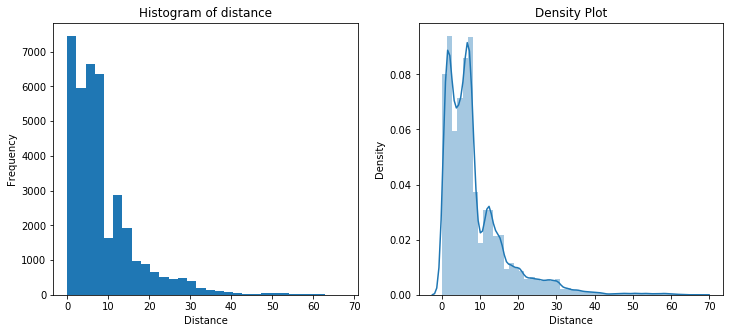

In [79]:
## Visualization of Haversine distance 
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(listcop["Haversine_distance"],bins=30)
plt.title('Histogram of distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.subplot(122,)
sns.distplot(listcop["Haversine_distance"])
plt.title('Density Plot')
plt.xlabel('Distance')
plt.ylabel('Density')

We can see the distribution is heavily right skewed. Hence, we could consider to log transform this feature. 

In [80]:
## Using log-transform for the Haversine distance
listcop['Log_Haversine_Distance'] = np.log(listcop['Haversine_distance'])

Text(0, 0.5, 'Density')

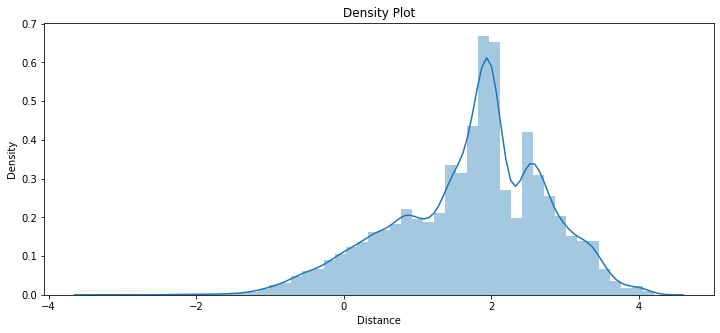

In [81]:
# Plot log of Haversine distance
plt.figure(figsize=(12,5))
sns.distplot(listcop['Log_Haversine_Distance'])
plt.title('Density Plot')
plt.xlabel('Distance')
plt.ylabel('Density')

The distribution of this continuous variable seems reasonably normal

Lets also check the distribution of target "price" :

Text(0, 0.5, 'density')

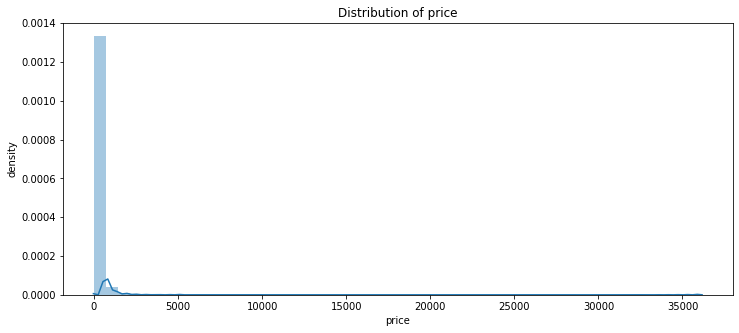

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(listcop.price)
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('density')

The distribution is heavily right skewed. We should try log-transform the *price* for the ease of further analysis.

Text(0, 0.5, 'density')

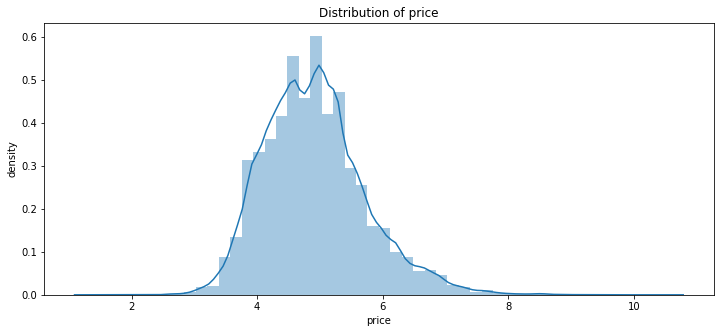

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(np.log(listcop.price))
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('density')

Log-transformed price makes the distribution seems approximately normal. And this could be easier for later modeling steps.

In [85]:
## Log transform the price
listcop['log_price'] = np.log(listcop['price']+1)

#### 1. Categorical Data Analysis

In [86]:
listcop.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,smart_location,price,extra_people,Haversine_distance,Log_Haversine_Distance,log_price
0,f,1,1,t,f,Sydney,t,Apartment,Private room,1,1.0,1,1,Real Bed,1,2,180,2,2,180,180,2.0,180.0,5 weeks ago,t,27,57,87,354,185,10,f,f,f,moderate,f,f,1,0,1,0,Potts Point,65.0,0.0,2.569058,0.943539,4.189655
1,t,2,2,t,t,Sydney,t,Townhouse,Private room,2,1.0,1,1,Real Bed,2,2,5,2,2,5,5,2.0,5.0,3 days ago,t,14,19,19,19,516,46,f,f,f,strict_14_with_grace_period,t,t,2,0,2,0,Pyrmont,14316.0,395.0,2.431575,0.888539,9.569203
2,f,2,2,t,t,Manly,t,House,Entire home/apt,6,3.0,3,3,Real Bed,6,5,22,5,5,22,22,5.0,22.0,2 months ago,t,0,0,0,99,2,1,f,f,f,strict_14_with_grace_period,f,f,2,2,0,0,Balgowlah,470.0,40.0,10.066189,2.309182,6.154858
3,f,3,3,t,t,Sydney,f,Apartment,Private room,2,1.0,1,1,Real Bed,1,2,7,2,2,7,7,2.0,7.0,4 days ago,t,22,52,82,336,323,49,f,t,f,strict_14_with_grace_period,f,f,3,2,1,0,Darlinghurst,110.0,10.0,1.094128,0.089958,4.709530
4,t,2,2,t,t,Leichhardt,t,House,Entire home/apt,8,2.0,4,4,Real Bed,6,7,365,7,7,365,365,7.0,365.0,3 months ago,t,0,0,0,142,16,1,f,f,f,strict_14_with_grace_period,t,t,1,1,0,0,Balmain,450.0,0.0,4.475645,1.498651,6.111467


In [84]:
## Get a quick frequency counts 
cate_summary = pd.DataFrame(columns=['categorical feature','frequency distribution'])
for name in listcop.columns.values:
    if name not in listcop.describe().columns.values:
        cate_summary = cate_summary.append({'categorical feature':name,
                                            'frequency distribution':dict(listcop[name].value_counts())}, ignore_index=True)
cate_summary

,categorical feature,frequency distribution
0,host_is_superhost,"{'f': 32596, 't': 5479}"
1,host_has_profile_pic,"{'t': 37988, 'f': 87}"
2,host_identity_verified,"{'f': 23688, 't': 14387}"
3,neighbourhood_cleansed,"{'Sydney': 9745, 'Waverley': 5437, 'Randwick':..."
4,is_location_exact,"{'t': 28088, 'f': 9987}"
5,property_type,"{'Apartment': 22404, 'House': 10140, 'Townhous..."
6,room_type,"{'Entire home/apt': 23410, 'Private room': 139..."
7,bed_type,"{'Real Bed': 37901, 'Pull-out Sofa': 93, 'Futo..."
8,calendar_updated,"{'today': 5890, '2 months ago': 1792, '3 month..."
9,has_availability,{'t': 38075}


As we can see that *host_is_superhost, host_has_profile_pic, has_availability, requires_license, is_business_travel_ready, require_guest_profile_picture, require_guest_phone_verification* has significant amount of either 'True' or 'False' and some of them have all values are 'True' or 'False'. So, these variables are reduncdant features and should be dropped from our dataset.

In [87]:
## Dropping some reduncdant features
listcop = listcop.drop(["host_is_superhost","host_has_profile_pic","has_availability","requires_license",
                        "is_business_travel_ready","require_guest_profile_picture","require_guest_phone_verification"],axis=1)

What is the distribution of property type?

In [88]:
tab = pd.DataFrame(listcop['property_type'].value_counts()).rename(columns={"property_type":"Counts"})
tab["Frequency"] = tab["Counts"]/sum(tab["Counts"])*100
tab.head(20)

,Counts,Frequency
Apartment,22404,58.841760
House,10140,26.631648
Townhouse,1727,4.535785
Condominium,760,1.996060
Guest suite,549,1.441891
Guesthouse,444,1.166120
Villa,300,0.787919
Serviced apartment,296,0.777413
Loft,235,0.617203
Bed and breakfast,206,0.541037


From the frequency table, we can see that most property listings on Airbnb in Sydney are Apartments and Houses, which accounts for about 58.84% and 26.63%, respectively. <br>
Other property listings are much less frequent, so we can consider grouping these properties into one group, e.g. <i>"Other Types"<i>.

In [89]:
## Grouping property types other than Apartment and House into "Other Types" 
listcop['property_type'][(listcop.property_type!="Apartment") & (listcop.property_type!="House")]="Other Types"
listcop["property_type"].unique()

array(['Apartment', 'Other Types', 'House'], dtype=object)

In [90]:
# Checking the groupings distribution of property listing
tab1 = pd.DataFrame(listcop['property_type'].value_counts()).rename(columns={"property_type":"Counts"})
tab1["Frequency"] = tab1["Counts"]/sum(tab1["Counts"])*100
tab1

,Counts,Frequency
Apartment,22404,58.841760
House,10140,26.631648
Other Types,5531,14.526592


Text(0.5, 1.02, 'Frequency distribution of property listings')

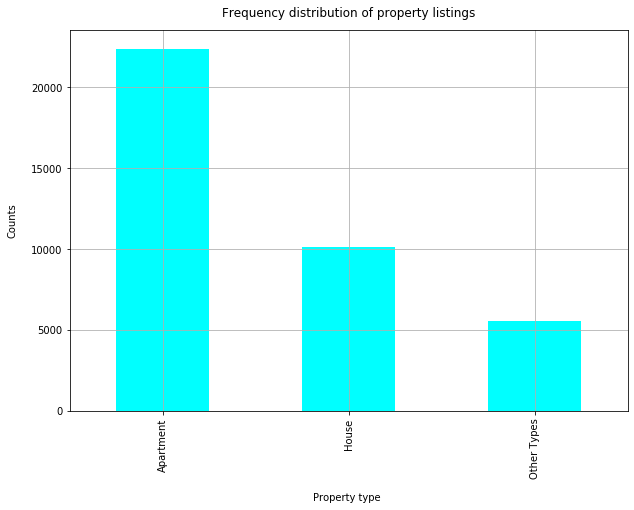

In [23]:
# Barplot of the top 15 wanted property
listcop['property_type'].value_counts().plot(kind='bar',figsize=(10,7), color = "cyan", grid=True)
plt.xlabel("Property type ", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Frequency distribution of property listings", y=1.02)

Room type by property type:

In [91]:
# frequency table
tab2 = pd.crosstab(listcop['property_type'], listcop['room_type'], margins=True, margins_name="Total")
tab2[tab2['Total']>=100]

room_type,Entire home/apt,Private room,Shared room,Total
property_type,,,,
Apartment,14945,7051,408,22404
House,5444,4500,196,10140
Other Types,3021,2372,138,5531
Total,23410,13923,742,38075


In [25]:
# Proportion table
tab2.div(tab2.Total.astype(float),axis=0)

room_type,Entire home/apt,Private room,Shared room,Total
property_type,,,,
Apartment,0.667068,0.314721,0.018211,1.0
House,0.536884,0.443787,0.019329,1.0
Other Types,0.546194,0.428856,0.024950,1.0
Total,0.614839,0.365673,0.019488,1.0


Text(0, 0.5, 'Proportion of listings')

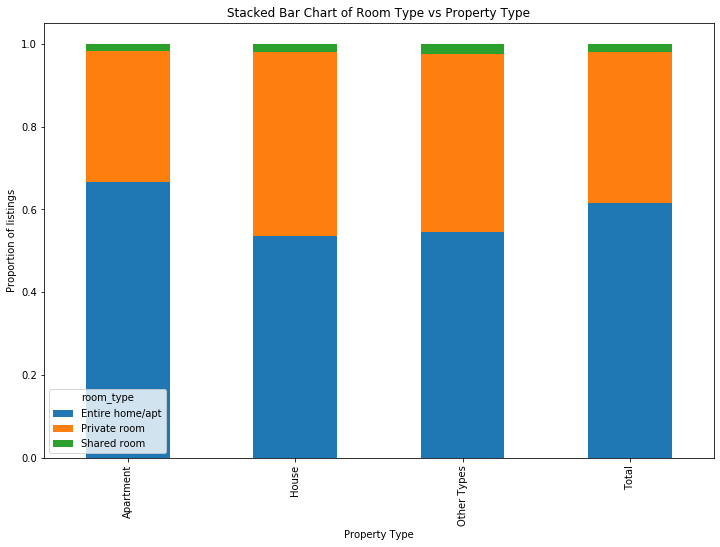

In [21]:
## Visualize the result
tab2.div(tab2.Total.astype(float),axis=0).iloc[:,0:3].plot(figsize=(12,8),kind='bar',stacked=True)
plt.title("Stacked Bar Chart of Room Type vs Property Type")
plt.xlabel("Property Type")
plt.ylabel("Proportion of listings")

In [26]:
## Chi-square test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(tab2.iloc[0:3,0:3])

# Interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0): The two variables are dependent') 
else: 
    print('Independent (H0 holds true): Two variables might be independent') 

p value is 2.0555747653886704e-137
Dependent (reject H0): The two variables are dependent


We can see that most people in Sydney list their entire apartment or property for rent in all kinds of property while the second most popular room type for rent is private room. <br>
And it also seems that room types and property types are dependent variables. This might not be a good news for modeling step. Later on, we will check the dependency among categorical variables in the data.

Bed type distribution by property type:

In [92]:
# Frequency table
tab3 = pd.crosstab(listcop['property_type'],listcop['bed_type'], margins=True, margins_name="Total")
tab3[tab3['Total'] >= 100]

bed_type,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Total
property_type,,,,,,
Apartment,13,9,28,59,22295,22404
House,3,3,9,13,10112,10140
Other Types,10,2,4,21,5494,5531
Total,26,14,41,93,37901,38075


In [24]:
# Proportion table
tab3.div(tab3.Total.astype(float), axis=0)

bed_type,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Total
property_type,,,,,,
Apartment,0.000580,0.000402,0.001250,0.002633,0.995135,1.0
House,0.000296,0.000296,0.000888,0.001282,0.997239,1.0
Other Types,0.001808,0.000362,0.000723,0.003797,0.993310,1.0
Total,0.000683,0.000368,0.001077,0.002443,0.995430,1.0


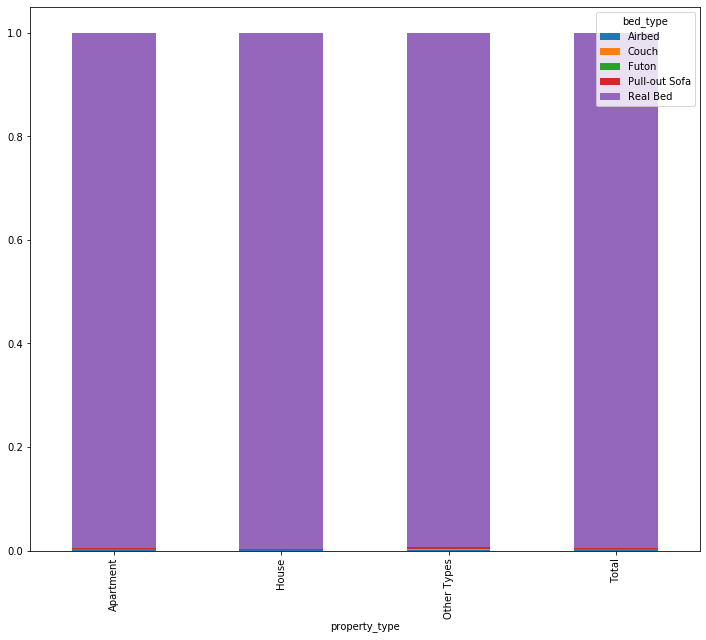

In [25]:
# Visualization
tab3.div(tab3.Total.astype(float), axis=0).iloc[:,0:5].plot(figsize=(12,10),kind='bar',stacked=True)

It is also obvious that the most popular bed type is real bed. And because the proportion of real bed accounts for about 99% of the whole data so this variable may not be so informative and could be reduncdant. Hence, we might consider to drop this variable off the dataset.

In [93]:
# Dropping the bed type variable
listcop = listcop.drop("bed_type",axis=1)

See the frequency table of cancelation policy:

In [94]:
tab4 = pd.DataFrame(listcop['cancellation_policy'].value_counts()).rename(columns={"cancellation_policy":"Counts"})
tab4

,Counts
strict_14_with_grace_period,15365
flexible,13922
moderate,8587
super_strict_60,111
super_strict_30,67
luxury_super_strict_125,8
luxury_no_refund,7
luxury_moderate,7
luxury_super_strict_95,1


As we can see that we can group the the last cancellation policies into one group with *moderate* policy

In [95]:
# Grouping the cancellation policy types in listing data.
listcop['cancellation_policy'][(listcop.cancellation_policy!="strict_14_with_grace_period") & 
                               (listcop.cancellation_policy!="flexible")]="Moderate and other types"
listcop["cancellation_policy"].unique()

array(['Moderate and other types', 'strict_14_with_grace_period',
       'flexible'], dtype=object)

See the cross frequency table of cancellation policy and property type:

In [96]:
# Frequency table
tab5 = pd.crosstab(listcop['property_type'], listcop['cancellation_policy'], margins=True, margins_name="Total")
tab5

cancellation_policy,Moderate and other types,flexible,strict_14_with_grace_period,Total
property_type,,,,
Apartment,5222,8159,9023,22404
House,2086,3733,4321,10140
Other Types,1480,2030,2021,5531
Total,8788,13922,15365,38075


In [32]:
# Proportion table
tab5.div(tab5.Total.astype(float), axis=0).iloc[:,0:3]*100

cancellation_policy,Moderate and other types,flexible,strict_14_with_grace_period
property_type,,,
Apartment,23.308338,36.417604,40.274058
House,20.571992,36.814596,42.613412
Other Types,26.758272,36.702224,36.539505
Total,23.080762,36.564675,40.354563


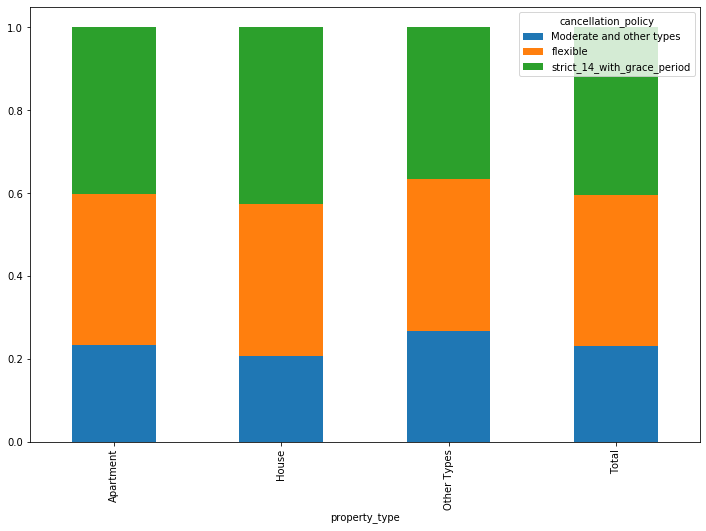

In [31]:
# Visualization
tab5.div(tab5.Total.astype(float), axis=0).iloc[:,0:3].plot(figsize=(12,8),kind='bar',stacked=True)

Apartments with strict and flexible policy types are the most commonly listed. The second most common one is House with strict and flexible policy. <br>
The variability of policy types among property types is not significantly different

In [33]:
listcop['calendar_updated'].unique()  ## check categories in "calendar_updated"

array(['5 weeks ago', '3 days ago', '2 months ago', '4 days ago',
       '3 months ago', '4 months ago', 'a week ago', 'today',
       '26 months ago', '30 months ago', '10 months ago', 'yesterday',
       '6 weeks ago', '13 months ago', '2 weeks ago', '15 months ago',
       '37 months ago', '5 months ago', '11 months ago', '20 months ago',
       '4 weeks ago', '5 days ago', '41 months ago', '19 months ago',
       '7 months ago', '3 weeks ago', '17 months ago', '31 months ago',
       '33 months ago', '8 months ago', '57 months ago', '70 months ago',
       '28 months ago', '34 months ago', '21 months ago', '16 months ago',
       '6 days ago', '49 months ago', '6 months ago', '46 months ago',
       '32 months ago', '12 months ago', '43 months ago', '27 months ago',
       '29 months ago', '9 months ago', '7 weeks ago', '23 months ago',
       '40 months ago', '45 months ago', '1 week ago', '18 months ago',
       '47 months ago', '59 months ago', '44 months ago', '48 months ago',


As we can see there are so much categories in this "calendar_updated" variable. So, we definitely need to group them for better analysis and modeling. <br>
Below here we will see the frequency counts of this variable

In [34]:
listcop["calendar_updated"].value_counts()/sum(listcop["calendar_updated"].value_counts())*100

today            15.469468
2 months ago      4.706500
3 months ago      4.496389
2 weeks ago       4.480630
a week ago        4.459619
                   ...    
83 months ago     0.002626
74 months ago     0.002626
70 months ago     0.002626
60 months ago     0.002626
69 months ago     0.002626
Name: calendar_updated, Length: 84, dtype: float64

As we can see the proportion in most categories, except "today", are less than 5%. It is suggested we need to group these categories by some logic.<br>
* group 1: 'yesterday', 'today' (or "recently updated")
* group 2: 2-6 days
* group 3: 1-7 weeks
* group 4: 2-6 months
* group 5: >6-12 months
* group 6: >12-24 months
* group 7: >24 months or never

In [ ]:
'''

## Grouping the levels in 'calendar_updated'  (BUT CODE IS NOT RECOMMENDED)
for i in range(len(listcop['calendar_updated'])):
    word = listcop.calendar_updated[i].split()
    if len(word) == 1:
        if word[0] =='yesterday' or word[0] == 'today':
            word = 'most recently updated'
    else:
        if word[0] == 'a': word[0]='1'
        if word[1]=='days' or word[1] =='day':
            word = '2-6 days'
        if word[1]=='week' or word[1] == 'weeks':
            word = '1-7 weeks'
        if word[1] == 'months' or word[1] == 'month':
            if int(word[0]) <= 6: 
                word = '2-6 months'
            elif int(word[0]) <=12:
                word = '>6-12 months'
            elif int(word[0]) <= 24:
                word = '>12-24 months'
            else:
                word = '>24 months or never'
    listcop.calendar_updated[i] = word

'''

But above code is terrible and we can do as following:

In [97]:
#### Categorization of "neighbourhood_cleansed"

listcop['calendar_updated'][listcop['calendar_updated'].str[0]=='a']=listcop['calendar_updated'][listcop['calendar_updated'].str[0]=='a'].str.replace('a','1',1) 
# replace every word "a..." by '1'

listcop['calendar_updated'][(listcop['calendar_updated']=="yesterday") |
                            (listcop['calendar_updated']=="today")]="recently updated"

listcop['calendar_updated'][(listcop['calendar_updated'].str.contains("day")) & (listcop['calendar_updated']!="yesterday") & 
                            (listcop['calendar_updated']!="today")]="2-6 days"

listcop['calendar_updated'][listcop['calendar_updated'].str.contains("week")]="1-7 weeks"

index1 = listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")][listcop['calendar_updated']
    [listcop['calendar_updated'].str.contains("month")].str[0:2].astype(int)<=6].index

index2 = listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")][
    (listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")].str[0:2].astype(int)>6) 
     &
     (listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")].str[0:2].astype(int)<=12)].index

index3 = listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")][
    (listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")].str[0:2].astype(int)>12) 
     &
    (listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")].str[0:2].astype(int)<=24)].index

index4 = listcop['calendar_updated'][listcop['calendar_updated'].str.contains("month")][listcop['calendar_updated']
    [listcop['calendar_updated'].str.contains("month")].str[0:2].astype(int)>24].index
     
listcop.loc[index1,'calendar_updated']="2-6 months"

listcop.loc[index2,'calendar_updated']=">6-12 months"

listcop.loc[index3,'calendar_updated']=">12-24 months"

listcop.loc[index4,'calendar_updated']=">24 months or never"

listcop['calendar_updated'][listcop['calendar_updated']=="never"]=">24 months or never"

# Check categories
listcop['calendar_updated'].unique()

array(['1-7 weeks', '2-6 days', '2-6 months', 'recently updated',
       '>24 months or never', '>6-12 months', '>12-24 months'],
      dtype=object)

In [36]:
## Checking levels of "neighbourhood_cleansed"
listcop['neighbourhood_cleansed'].unique()

array(['Sydney', 'Manly', 'Leichhardt', 'Woollahra', 'North Sydney',
       'Waverley', 'Mosman', 'Pittwater', 'Lane Cove', 'Marrickville',
       'Hornsby', 'Warringah', 'Rockdale', 'Randwick', 'Sutherland Shire',
       'Ku-Ring-Gai', 'Strathfield', 'Canterbury', 'Blacktown',
       'Willoughby', 'Auburn', 'Canada Bay', 'The Hills Shire',
       'Ashfield', 'Parramatta', 'Hurstville', 'Ryde', 'Botany Bay',
       'Holroyd', 'Penrith', 'Bankstown', 'Hunters Hill', 'Burwood',
       'Campbelltown', 'Camden', 'Liverpool', 'City Of Kogarah',
       'Fairfield'], dtype=object)

This categorical variable also has too many levels. Again, we could check the proportion distribution of these categories and group them appropriately 

In [69]:
## Proportion table of "neighbourhood_cleansed"
pd.DataFrame(listcop['neighbourhood_cleansed'].value_counts()/
    sum(listcop['neighbourhood_cleansed'].value_counts())*100).rename_axis("neighborhoods").rename(
    columns={"neighbourhood_cleansed":"Proportion"})

,Proportion
neighborhoods,
Sydney,25.594222
Waverley,14.279711
Randwick,8.916612
Manly,4.864084
Warringah,4.774787
Woollahra,4.265266
North Sydney,3.697965
Marrickville,3.495732
Pittwater,3.091267


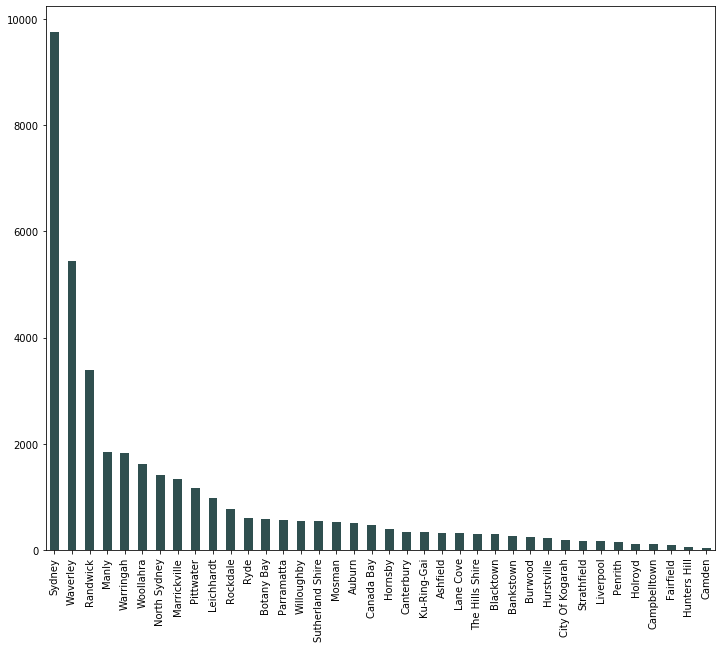

In [77]:
listcop['neighbourhood_cleansed'].value_counts().plot.bar(figsize=(12,10), color="darkslategrey")

As presented above, most listing properties are located in "Sydney Central" while the second and third most listings lies in "Waverley" and "Randwick". <br> 

Grouping "neighbourhood_cleansed", we can use the <b>*k-means*</b> algorithm from scikit-learn library. This algorithm simply:
* Step 1: First initially assigned random k data points as centroids.
* Step 2: Then based on similarity measure (i.e. Euclidean distance) between each data point in dataset to each centroid, the data will be assigned to the cluster which have the closest centroid to that data point.
* Step 3: After that the new centroid will be recalculated in each cluster and and the step 2 will be redo again.
* Step 4: Step 2 and 3 above will be repeated until no significant changes in centroid values observed. <br>

This algorithm will be applied to the Haversine distance and based on the clusters implied, we will group places in "neighbourhood cleansed" accordingly on the corresponding index.

In [106]:
## K-means clustering for the "neighbourhood_cleansed" grouping based on "Haversine_distance" numerical values
from sklearn.cluster import KMeans
X = np.array(listcop['Haversine_distance'].copy())
kmeans = KMeans(n_clusters=3, random_state=0).fit(X.reshape(-1,1))
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 0])

In [108]:
## Checking frequency distribution among groups implied
kmeans_labels = kmeans.labels_.copy()
groups_table = pd.concat([listcop['neighbourhood_cleansed'],pd.Series(kmeans_labels)], axis=1).rename(columns={0:"Labels"})
pd.DataFrame(groups_table["Labels"].value_counts()/sum(groups_table["Labels"].value_counts())*100).rename(
    columns={"Labels":"Frequency"})

,Frequency
1,70.600131
0,22.991464
2,6.408404


As we can see the frequency proportion seems ok and can be used for later modelling. The smallest proportion observed is > 5%, which is good. 

In [109]:
## Check the detail places of each group
group1 = groups_table["neighbourhood_cleansed"][groups_table["Labels"]==0].unique()
group2 = groups_table["neighbourhood_cleansed"][groups_table["Labels"]==1].unique()
group3 = groups_table["neighbourhood_cleansed"][groups_table["Labels"]==2].unique()
## See 4 groups results
print(group1)
print(group2)
print(group3)

['Manly' 'Hornsby' 'Warringah' 'Sutherland Shire' 'Ku-Ring-Gai'
 'Pittwater' 'Strathfield' 'Canterbury' 'Auburn' 'Parramatta' 'Hurstville'
 'Randwick' 'Ryde' 'Bankstown' 'Rockdale' 'Burwood' 'Canada Bay'
 'City Of Kogarah' 'Willoughby' 'Ashfield' 'Hunters Hill'
 'The Hills Shire' 'Holroyd' 'Lane Cove']
['Sydney' 'Leichhardt' 'Woollahra' 'North Sydney' 'Waverley' 'Mosman'
 'Lane Cove' 'Marrickville' 'Rockdale' 'Randwick' 'Willoughby'
 'Canada Bay' 'Ashfield' 'Botany Bay' 'Manly' 'Hunters Hill' 'Canterbury'
 'Ryde']
['Pittwater' 'Blacktown' 'The Hills Shire' 'Holroyd' 'Penrith' 'Warringah'
 'Hornsby' 'Campbelltown' 'Parramatta' 'Camden' 'Sutherland Shire'
 'Liverpool' 'Bankstown' 'Fairfield']


As the "Haversine distance" we measure here is the distance away from the Sydney central station. So, we would like to group the places in "neighbourhood_cleansed" according to the distance away from the Sydney central station.

In [112]:
## The centroid of each cluster
kmeans.cluster_centers_

array([[14.81106699],
       [ 4.50900554],
       [32.60237224]])

As we can see that the group 1 contains places that are 14.81 km away from Sydney central station in average, group 2 contains places that are 4.5 km away from central station in average and group 3 contains places that are 32.6 km away from central station in average. 

In [117]:
# New groups_table
groups_table = pd.concat([groups_table,listcop["Haversine_distance"]], axis=1)

In [120]:
## Getting the distances that is closest and farthest to the centroid in each cluster
print("group 1 min is ",min(groups_table["Haversine_distance"][groups_table["Labels"]==0])," and max is ",
     max(groups_table["Haversine_distance"][groups_table["Labels"]==0]))
print("group 2 min is ",min(groups_table["Haversine_distance"][groups_table["Labels"]==1])," and max is ",
     max(groups_table["Haversine_distance"][groups_table["Labels"]==1]))
print("group 3 min is ",min(groups_table["Haversine_distance"][groups_table["Labels"]==2])," and max is ",
     max(groups_table["Haversine_distance"][groups_table["Labels"]==2]))

group 1 min is  9.663634116070034  and max is  23.697489433627812
group 2 min is  0.03844540843699184  and max is  9.658456317183429
group 3 min is  23.707533576615553  and max is  67.41975757256199


So, we can overall group levels in "neighbourhood_cleansed" as following:
* group 1: 9.66-23.69 km away from central station
* group 2: 0.04-9.65 km away from central station
* group 3: 23.70-67.42 km away from central station

In [121]:
##  Grouping levels in "neighbourhood_cleansed" and rename as "Distance_to_CentralStation"
for word in group1:
    listcop['neighbourhood_cleansed'] = listcop['neighbourhood_cleansed'].replace(word,'9.66-23.69 km')
for word in group2:
    listcop['neighbourhood_cleansed'] = listcop['neighbourhood_cleansed'].replace(word,'0.04-9.65 km')
for word in group3:
    listcop['neighbourhood_cleansed'] = listcop['neighbourhood_cleansed'].replace(word,'23.70-67.42 km')

listcop.rename(columns={"neighbourhood_cleansed":"Distance_to_CentralStation"}, inplace=True) # rename

In [125]:
listcop['Distance_to_CentralStation'].unique()

array(['0.04-9.65 km', '9.66-23.69 km', '23.70-67.42 km'], dtype=object)

Text(0.5, 1.0, 'Bar Plot')

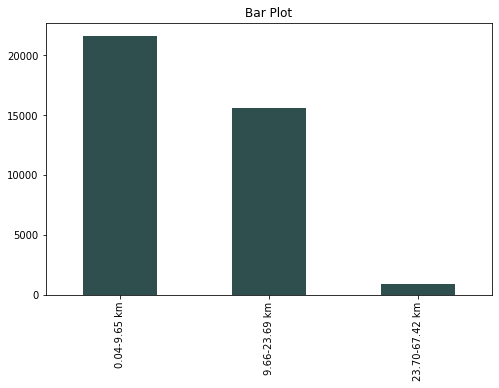

In [126]:
# Visualization
plt.figure(figsize=(8,5))
listcop['Distance_to_CentralStation'].value_counts().plot.bar(color='darkslategrey')
plt.title('Bar Plot')

In [90]:
## Single-Linkage clustering for "neighbourhood_cleansed" grouping based on "Haversine_distance" numerical values


Next we move to grouping "smart_location". And again, we can use k-means algorithm to group "smart_location" based on the cluser implied from Haversine distance calculated.

Text(0.5, 0, 'frequency')

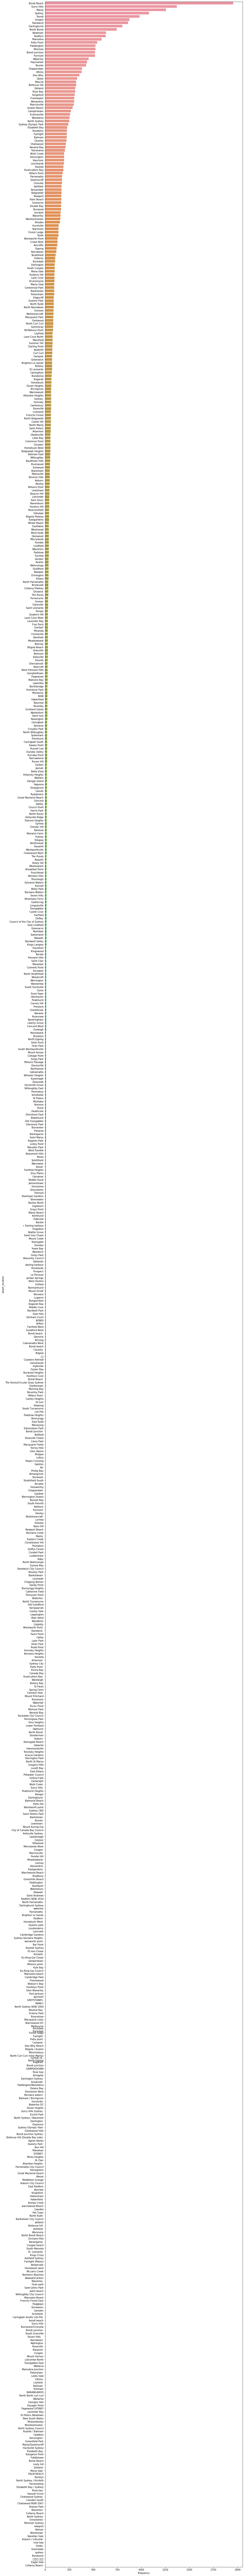

In [128]:
# Table of frequency of 'smart_location'
Locfreq = listcop['smart_location'].value_counts().reset_index()
# Rename columns of Locfreq
Locfreq=Locfreq.rename(columns={'index':'smart_location','smart_location':'frequency'})
# Barplot of 'smart_location'
plt.figure(figsize=(15,200))
ax = sns.barplot(x='frequency', y='smart_location', data=Locfreq)
ax.set_xlabel('frequency')

From the barplot, we can roughly see four separated groups of locations:

In [129]:
# Grouping in smart_location
group1 = Locfreq[Locfreq['frequency']>300]['smart_location'].unique()
group2 = Locfreq[(Locfreq['frequency']<=300) & (Locfreq['frequency'] >100)]['smart_location'].unique()
group3 = Locfreq[(Locfreq['frequency']<=100) & (Locfreq['frequency'] >10)]['smart_location'].unique()
group4 = Locfreq[Locfreq['frequency']<=10]['smart_location'].unique()

In [130]:
# Frequency observed within each group
print(sum(Locfreq[Locfreq['frequency']>300]['frequency']))
print(sum(Locfreq[(Locfreq['frequency']<=300) & (Locfreq['frequency'] >100)]['frequency']))
print(sum(Locfreq[(Locfreq['frequency']<=100) & (Locfreq['frequency'] >10)]['frequency']))
print(sum(Locfreq[Locfreq['frequency']<=10]['frequency']))

19325
8939
8325
1486


We will modify the location groups as: <br>
_ Top group: frequency > 300  <br>
_ 1st Middle group: 100 < frequency <= 300  <br>
_ 2nd Middle group: 10 < frequency <= 100 <br>
_ Bottom group: frequency <= 10

In [131]:
# Modify level of 'smart_location'
for word in group1:
    listcop['smart_location'] = listcop['smart_location'].replace(word,'Top group')
for word in group2:
    listcop['smart_location'] = listcop['smart_location'].replace(word,'1st Middle group')
for word in group3:
    listcop['smart_location'] = listcop['smart_location'].replace(word,'2nd Middle group')
for word in group4:
    listcop['smart_location'] = listcop['smart_location'].replace(word,'Bottom group')

In [132]:
listcop['smart_location'].unique()

array(['Top group', '1st Middle group', '2nd Middle group',
       'Bottom group'], dtype=object)

In [143]:
## Current categorical variables in data
listcop.drop(listcop.describe().columns,axis=1).columns

Index(['host_identity_verified', 'Distance_to_CentralStation', 'is_location_exact',
       'property_type', 'room_type', 'calendar_updated', 'instant_bookable', 'cancellation_policy',
       'smart_location'],
      dtype='object')

In [84]:
## Current columns in the listcop data
listcop.columns

Index(['host_listings_count', 'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calendar_updated', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'smart_location', 'extra_people',
       'Log_Haversine_Distance', 'log_price', 'price'],
      dtype='object')

#### 2. Continuous Data Analysis

Average sale price by different property types

In [63]:
listcop[["property_type","price"]].groupby("property_type").mean()

,price
property_type,
Apartment,163.496831
House,299.772189
Other Types,205.118062


Text(0, 0.5, 'log price')

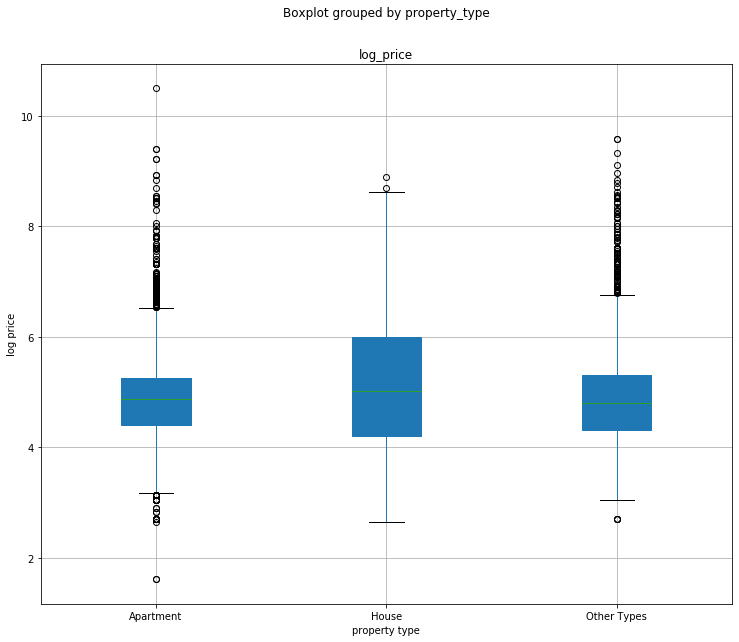

In [62]:
## Visualization by matplotlib
listcop[['log_price','property_type']].boxplot(figsize=(12,10),by='property_type', patch_artist=True)
plt.xlabel('property type')
plt.ylabel('log price')

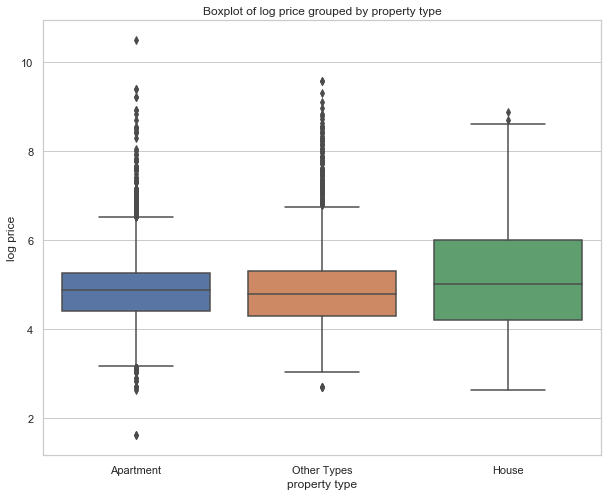

In [77]:
## Visualization by seaborn
plt.figure(figsize=(10,8))
ax = sns.boxplot(y=listcop.log_price, x=listcop.property_type, linewidth=1.5)
ax.set(ylabel="log price",xlabel="property type", title="Boxplot of log price grouped by property type")
sns.set(style="whitegrid")

It can be seen that the variability in price among property types seems not be significantly different from each other. Houses have a wider spread of variability in prices than other properties. The average rental price for house is higher than for apartment and other types of property. 

In [149]:
listcop.drop(["Haversine_distance"],axis=1,inplace = True)

#### 3. Correlation and dependence analysis

Now we will separate target data and feature data:

In [150]:
# Store target and features set
y = listcop['price'].copy()
X = listcop.drop(['price'],axis=1).copy()

We will conduct analysis of some continuous variables below:

In [151]:
## (2.1) Continuous Variables Analysis
contnames = X.describe().columns.values  # continuous feature names
catenames = X.drop(contnames,axis=1).columns.values  # categorical feature names
X_cont = X[contnames].copy()

_ Correlation matrix plot:

Text(0.5, 1, 'Correlation Matrix')

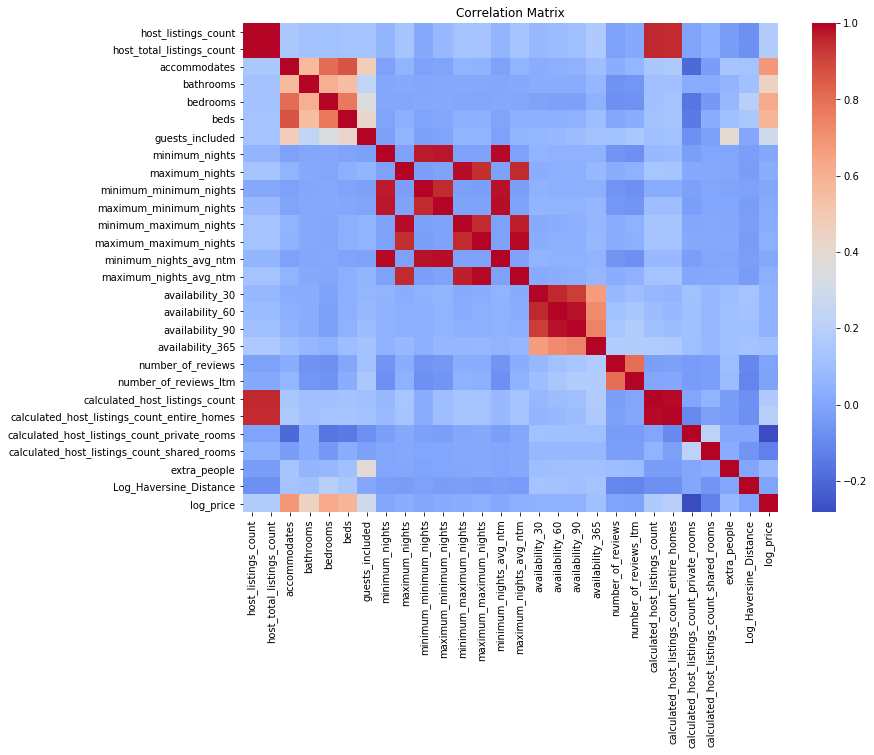

In [152]:
# Correlation matrix between continuous variables
corplot = X_cont.corr() 
# Plot correlation matrix
plt.figure(1,figsize = (12,9))
sns.heatmap(corplot,cmap='coolwarm')
plt.title('Correlation Matrix')

Next, we will subset out the highly correlated features (>75%):

In [153]:
# We will see high correlation values (>0.75)
tri_upper = pd.DataFrame(np.triu(corplot,k=1))  # an upper triangular part of correlation matrix (no diagonal)
tri_upper.columns = contnames # set names of this triangular matrix matched with continuous features names
# Choose out feature columns that have high correlation value (>0.75)
highcorr = ['host_listings_count']
for word in contnames:
    if any(tri_upper[word] >= 0.75):
        highcorr.append(word)
highcorr

['host_listings_count',
 'host_total_listings_count',
 'bedrooms',
 'beds',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_60',
 'availability_90',
 'number_of_reviews_ltm',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes']

We will keep bedrooms, beds, availability_60, availability_90 as these features might provides useful realtionship with target feature. 
We will drop remaining high correlated features.

In [154]:
# Drop high correlated variables
X = X.drop(['host_total_listings_count','beds','minimum_minimum_nights','maximum_minimum_nights',
                        'minimum_maximum_nights','maximum_maximum_nights','maximum_nights_avg_ntm',
                        'availability_90','number_of_reviews_ltm','calculated_host_listings_count',
                        'calculated_host_listings_count_entire_homes'],axis=1)

X_cont = X_cont.drop(['host_total_listings_count','beds','minimum_minimum_nights','maximum_minimum_nights',
                        'minimum_maximum_nights','maximum_maximum_nights','maximum_nights_avg_ntm',
                        'availability_90','number_of_reviews_ltm','calculated_host_listings_count',
                        'calculated_host_listings_count_entire_homes'],axis=1)

Text(0.5, 1.0, 'Density of listed rental price')

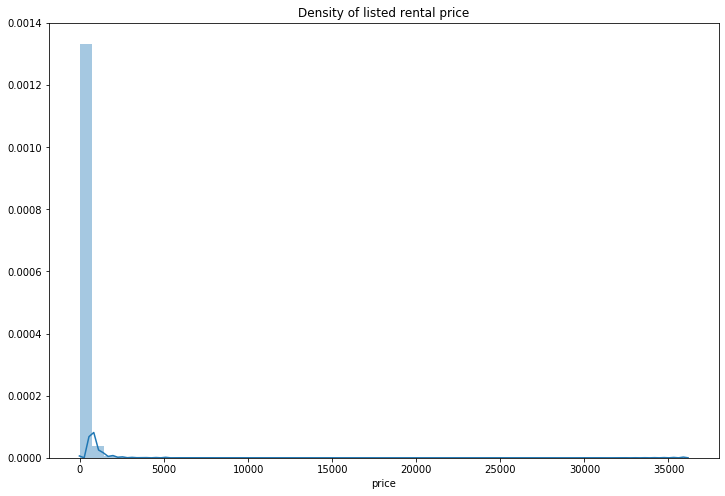

In [155]:
# Density plot of target variable
plt.figure(2,figsize = (12,8))
sns.distplot(y)
plt.title('Density of listed rental price')

Clearly, from the histogram and density plot above, we can see the target variable is extremely right-skewed. This would highly recommend transformation of target features. We will try log-transformation.

In [156]:
# Try transform target variable
y_log = y.apply(lambda x: np.log(x))

Text(0.5, 1.0, 'Density')

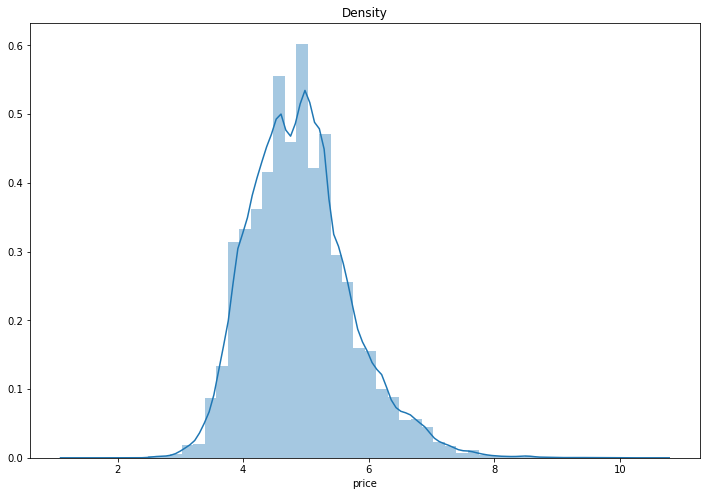

In [157]:
# Plot with new log-transformed target feature
plt.figure(2,figsize = (12,8))
sns.distplot(y_log)
plt.title('Density')

Clearly the histogram and density plot of log-transformed target feature seems closer to normal distribution now. The density plot and histogram plot of log-transformed target seems reasonably good.

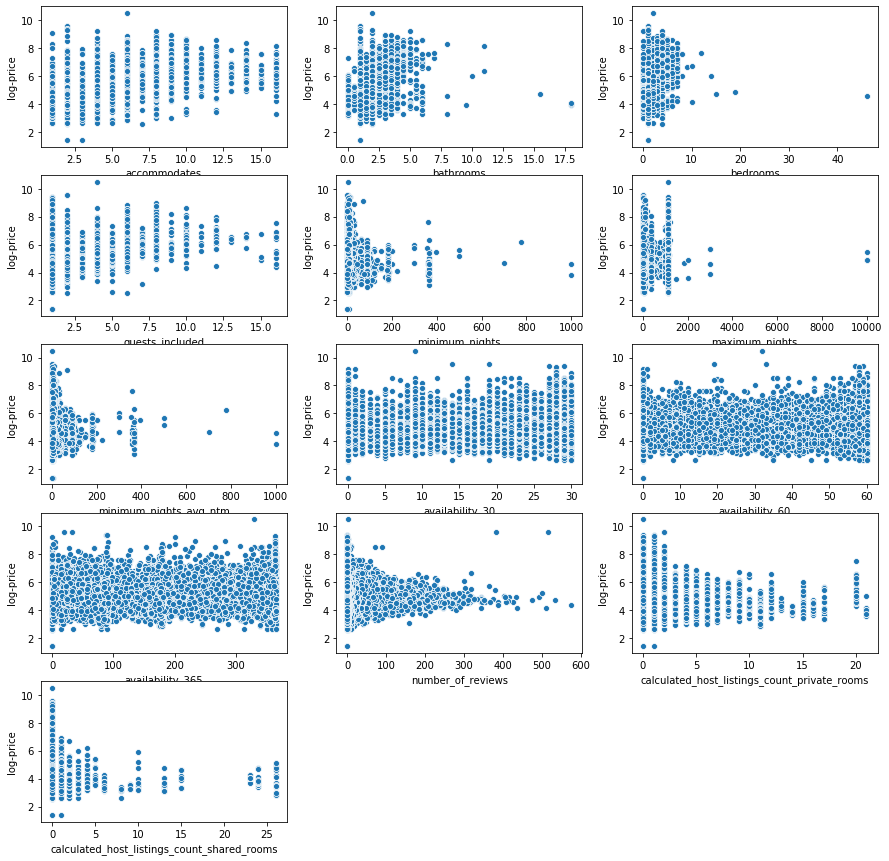

In [158]:
# Scatterplot of continuous features with log-target variable
contplot = X_cont.copy()
contplot['log-price'] = y_log
plt.figure(figsize=(15,15))
for i in range(1, 14):
    plt.subplot(5, 3, i)
    word = contplot.columns.values[i]
    sns.scatterplot(x=word,y="log-price",data=contplot)    
### Or alternatively,
#   f = plt.figure(figsize=(12,7))
#   for i in range(1, 15):
#       f.add_subplot(5, 3, i)
#       word = contplot.columns.values[i]
#       sns.scatterplot(x=word,y="log-price",data=contplot)

In [ ]:
X.drop(["log_price"],axis=1,inplace=True)  # drop log price 

In [176]:
# Output data to computer
# X.to_csv("D:/Data/Airbnb/X.csv", index=False)
# y.to_csv("D:/Data/Airbnb/y.csv", index=False)

## Stage 3: Model Fitting
In this stage, we will try different statistical models in fitting "cleaned" data. The models examined in our project includes Linear Regression, Ridge Regression, Decision Trees, and Random Forest.

In [1]:
''' STAGE III: MODEL FITTING '''
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# Import processed data from computer
dat = pd.read_csv("D:/Data/Airbnb/X.csv")    # dat = X.copy()
tar = pd.read_csv("D:/Data/Airbnb/y.csv")
tar_log = tar.apply(lambda x: np.log(x))

In [2]:
# Or if we continue use directly data from Stage 2:
# dat = X.copy()
# tar = y.copy()

In [4]:
# Adjust the data view setting to check full data
pd.set_option('display.max_rows', 53)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

Before moving to modelling part, we need to encode any categorical variables in dataset.

In [5]:
'''One-Hot Encoding for categorical features '''
# One-Hot Encoder for data using pd.get_dummies
contnames = dat.describe().columns.values
catenames = dat.drop(contnames,axis=1).columns.values
dat = pd.get_dummies(dat,columns=catenames)
dat.head(10)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_365,number_of_reviews,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,extra_people,Log_Haversine_Distance,host_identity_verified_f,host_identity_verified_t,Distance_to_CentralStation_0.04-9.65 km,Distance_to_CentralStation_23.70-67.42 km,Distance_to_CentralStation_9.66-23.69 km,is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_House,property_type_Other Types,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,calendar_updated_1-7 weeks,calendar_updated_2-6 days,calendar_updated_2-6 months,calendar_updated_>12-24 months,calendar_updated_>24 months or never,calendar_updated_>6-12 months,calendar_updated_recently updated,instant_bookable_f,instant_bookable_t,cancellation_policy_Moderate and other types,cancellation_policy_flexible,cancellation_policy_strict_14_with_grace_period,smart_location_1st Middle group,smart_location_2nd Middle group,smart_location_Bottom group,smart_location_Top group
0,1,1,1.0,1,1,2,180,2.0,27,57,354,185,1,0,0.0,0.943539,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,2,2,1.0,1,2,2,5,2.0,14,19,19,516,2,0,395.0,0.888539,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2,6,3.0,3,6,5,22,5.0,0,0,99,2,0,0,40.0,2.309182,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3,3,2,1.0,1,1,2,7,2.0,22,52,336,323,1,0,10.0,0.089958,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,2,8,2.0,4,6,7,365,7.0,0,0,142,16,0,0,0.0,1.498651,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
5,1,2,1.0,1,1,1,60,1.0,30,60,181,45,1,0,15.0,1.767267,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
6,2,2,1.0,0,2,2,730,2.0,12,12,187,63,0,1,25.0,1.559638,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
7,1,2,1.0,1,1,5,1125,5.0,8,8,8,10,0,0,10.0,2.133780,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
8,1,2,1.0,1,1,3,365,3.3,3,29,52,60,0,0,0.0,-0.000334,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
9,1,2,1.0,1,2,4,90,4.0,25,25,94,129,0,0,50.0,2.000937,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


Now, we split the data into training and test data.

In [6]:
# Splitting data
dat_train, dat_test, tar_train, tar_test = train_test_split(dat, tar_log, test_size = .30, random_state = 50)

But before fitting model, we need to standardizing continous variables

In [7]:
# Standardizing continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat_train[contnames] = scaler.fit_transform(dat_train[contnames])
dat_test[contnames] = scaler.fit_transform(dat_test[contnames])

#### 1. Linear Regression Model

In [8]:
'''(1): Linear Regression'''
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, mean_absolute_error  # for model accuracy and evaluation

In [16]:
# Create a linear regression object and fit model to data
ols = LinearRegression()
ols.fit(dat_train,tar_train)
# View intercept
ols_intercept = ols.intercept_
# View feature coefficients
ols_coef = ols.coef_
ols_coef = ols_coef.tolist()
ols_coef[0].insert(0, ols_intercept[0])  # Add intercept to the coefficient output
# Make prediction
ols_testpred = ols.predict(dat_test)
# R-Square 
R_squared = ols.score(dat_train,tar_train)
print('R-squared: %.2f' % R_squared)
# mean square error 
MSE = mean_squared_error(tar_test,ols_testpred)
print('MSE: {}'.format(MSE))
RMSE = np.sqrt(mean_squared_error(tar_test,ols_testpred))
print('RMSE: {}'.format(RMSE))

R-squared: 0.66
MSE: 0.2372682483477713
RMSE: 0.4871018870295734


In [17]:
# Coefficients of OLS output (with intercept)
feature_names = list(dat_train.columns.values)
feature_names.insert(0,'Intercept')
pd.DataFrame(ols_coef, columns = feature_names, index = ['OLS_Coefficients']).T.head(53)

,OLS_Coefficients
Intercept,2.387661e+11
host_listings_count,3.354641e-02
accommodates,1.989030e-01
bathrooms,8.446641e-02
bedrooms,1.899096e-01
guests_included,-3.551111e-02
minimum_nights,-5.762749e-02
maximum_nights,-2.296546e-05
minimum_nights_avg_ntm,3.998696e-02
availability_30,8.450900e-02


In [18]:
## The error rates of linear regression (OLS) model over both training and test set
ols_trainpred = ols.predict(dat_train)
# linear regression (OLS) training error
ols_train_error = [
    mean_squared_error(ols_trainpred, tar_train),
    mean_squared_log_error(ols_trainpred, tar_train),
    mean_absolute_error(ols_trainpred, tar_train)
]
# linear regression (OLS) test error
ols_test_error = [
    mean_squared_error(ols_testpred, tar_test),
    mean_squared_log_error(ols_testpred, tar_test),
    mean_absolute_error(ols_testpred, tar_test)
]
# error rate table of linear regression (OLS)
ols_scores = pd.DataFrame([ols_train_error,ols_test_error],columns=["MSE","MSLE","MAE"], index=["train","test"])
ols_scores

,MSE,MSLE,MAE
train,0.221331,0.006135,0.346287
test,0.237268,0.006393,0.351179


#### 2. Stochastic Gradient Descent

In [38]:
'''(2): Stochastic Gradient Descent''' 
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss ='squared_loss')
sgd.fit(dat_train, tar_train)
sgd_testpred = sgd.predict(dat_test)
# Using cross validation k = 5
sgd_scores = cross_val_score(sgd, dat_train, tar_train, cv=5)
print(sgd_scores)
# mean square error
print('MSE: {}'.format(mean_squared_error(tar_test,sgd_testpred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(tar_test,sgd_testpred))))

[0.65572732 0.63741729 0.6642508  0.65037233 0.67352382]
MSE: 0.24325848729782476
RMSE: 0.4932124160012851


In [10]:
## The error rates of stochastic gradient descent over both training and test set
sgd_trainpred = sgd.predict(dat_train)
# stochastic gradient descent training error
sgd_train_error = [
    mean_squared_error(sgd_trainpred, tar_train),
    mean_squared_log_error(sgd_trainpred, tar_train),
    mean_absolute_error(sgd_trainpred, tar_train)
]
# stochastic gradient descent test error
sgd_test_error = [
    mean_squared_error(sgd_testpred, tar_test),
    mean_squared_log_error(sgd_testpred, tar_test),
    mean_absolute_error(sgd_testpred, tar_test)
]
# error rate table of stochastic gradient descent
sgd_scores = pd.DataFrame([sgd_train_error,sgd_test_error],columns=["MSE","MSLE","MAE"], index=["train","test"])
sgd_scores

,MSE,MSLE,MAE
train,0.222941,0.006167,0.347219
test,0.239540,0.006436,0.352535


#### 3. Ridge Regression

In [12]:
'''(3): Ridge Regression'''
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(dat_train,tar_train)  # create models
ridge_testpred = ridge.predict(dat_test) # predictions
# R-Square
print('R-squared: %.2f' % ridge.score(dat_test,tar_test))
# mean square error
print('MSE: {}'.format(mean_squared_error(ridge_testpred,tar_test)))

R-squared: 0.64
MSE: 0.2372624962669653


In [13]:
## The error rates of ridge regression model over both training and test set
ridge_trainpred = ridge.predict(dat_train)
# ridge regression training error
ridge_train_error = [
    mean_squared_error(ridge_trainpred, tar_train),
    mean_squared_log_error(ridge_trainpred, tar_train),
    mean_absolute_error(ridge_trainpred, tar_train)
]
# ridge regression test error
ridge_test_error = [
    mean_squared_error(ridge_testpred, tar_test),
    mean_squared_log_error(ridge_testpred, tar_test),
    mean_absolute_error(ridge_testpred, tar_test)
]
# error rate table of ridge regression
ridge_scores = pd.DataFrame([ridge_train_error,ridge_test_error],columns=["MSE","MSLE","MAE"], index=["train","test"])
ridge_scores

,MSE,MSLE,MAE
train,0.221331,0.006135,0.346290
test,0.237262,0.006393,0.351182


#### 4. Decision Tree

In [28]:
'''(4): Decision Tree'''
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='mse',   # Initialize and fit regressor
                             max_depth=6) 
tree.fit(dat_train,tar_train)
tree_testpred = tree.predict(dat_test)
# mean squared error
print('MSE: {}'.format(mean_squared_error(tree_testpred,tar_test)))

MSE: 0.22544961235419086


In [29]:
## The error rates of decision tree model over both training and test set
tree_trainpred = tree.predict(dat_train)
# decision tree training error
tree_train_error = [
    mean_squared_error(tree_trainpred, tar_train),
    mean_squared_log_error(tree_trainpred, tar_train),
    mean_absolute_error(tree_trainpred, tar_train)
]
# decision tree test error
tree_test_error = [
    mean_squared_error(tree_testpred, tar_test),
    mean_squared_log_error(tree_testpred, tar_test),
    mean_absolute_error(tree_testpred, tar_test)
]
# error rate table of decision tree
tree_scores = pd.DataFrame([tree_train_error,tree_test_error],columns=["MSE","MSLE","MAE"], index=["train","test"])
tree_scores

,MSE,MSLE,MAE
train,0.208947,0.005798,0.335657
test,0.225450,0.006116,0.343320


#### 5. Gradient Boosting Regression

In [41]:
'''(5): Gradient Boosting '''
from sklearn.ensemble import GradientBoostingRegressor
# evaluate the model
gbr = GradientBoostingRegressor()
gbr.fit(dat_train, tar_train)
# make a single prediction
gbr_testpred = gbr.predict(dat_test)
# mean squared error
print('MSE: {}'.format(mean_squared_error(gbr_testpred,tar_test)))

MSE: 0.1974184303740817


In [42]:
## The error rates of gradient boosting regression over both training and test set
gbr_trainpred = gbr.predict(dat_train)
# gradient boosting regression training error
gbr_train_error = [
    mean_squared_error(gbr_trainpred, tar_train),
    mean_squared_log_error(gbr_trainpred, tar_train),
    mean_absolute_error(gbr_trainpred, tar_train)
]
# gradient boosting regression test error
gbr_test_error = [
    mean_squared_error(gbr_testpred, tar_test),
    mean_squared_log_error(gbr_testpred, tar_test),
    mean_absolute_error(gbr_testpred, tar_test)
]
# error rate table of gradient boosting regression
gbr_scores = pd.DataFrame([gbr_train_error,gbr_test_error],columns=["MSE","MSLE","MAE"], index=["train","test"])
gbr_scores

,MSE,MSLE,MAE
train,0.176628,0.004928,0.308308
test,0.197418,0.005413,0.321578


#### 6. Extreme Gradient Boosting (XGBoost)

In [48]:
'''(6): Extreme Gradient Boosting '''
from xgboost import XGBRegressor
# evaluate the model
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(dat_train, tar_train)
xgb_testpred = xgb.predict(dat_test)
# mean squared error
print('MSE: {}'.format(mean_squared_error(xgb_testpred,tar_test)))

MSE: 0.19580418257283413


In [49]:
## The error rates of extreme gradient boosting regression over both training and test set
xgb_trainpred = xgb.predict(dat_train)
# extreme gradient boosting regression training error
xgb_train_error = [
    mean_squared_error(xgb_trainpred, tar_train),
    mean_squared_log_error(xgb_trainpred, tar_train),
    mean_absolute_error(xgb_trainpred, tar_train)
]
# extreme gradient boosting regression test error
xgb_test_error = [
    mean_squared_error(xgb_testpred, tar_test),
    mean_squared_log_error(xgb_testpred, tar_test),
    mean_absolute_error(xgb_testpred, tar_test)
]
# error rate table of extreme gradient boosting regression
xgb_scores = pd.DataFrame([xgb_train_error,xgb_test_error],columns=["MSE","MSLE","MAE"], index=["train","test"])
xgb_scores

,MSE,MSLE,MAE
train,0.176972,0.004938,0.308273
test,0.195804,0.005363,0.320333


#### 7. Random Forest

In [14]:
'''(7): Random Forest '''
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(dat_train, tar_train) # create model
rfr_testpred = rfr.predict(dat_test)  # Predictions of test set
# mean squared error
print('MSE: {}'.format(mean_squared_error(rfr_testpred,tar_test)))

MSE: 0.19366256391688466


In [15]:
## The error rates of random forest model over both training and test set
rfr_trainpred = rfr.predict(dat_train)
# random forest training error
rfr_train_error = [
    mean_squared_error(rfr_trainpred, tar_train),
    mean_squared_log_error(rfr_trainpred, tar_train),
    mean_absolute_error(rfr_trainpred, tar_train)
]
# random forest test error
rfr_test_error = [
    mean_squared_error(rfr_testpred, tar_test),
    mean_squared_log_error(rfr_testpred, tar_test),
    mean_absolute_error(rfr_testpred, tar_test)
]
# error rate table of random forest
rfr_scores = pd.DataFrame([rfr_train_error,rfr_test_error],columns=["MSE","MSLE","MAE"], index=["train","test"])
rfr_scores

,MSE,MSLE,MAE
train,0.024950,0.000699,0.113321
test,0.193663,0.005296,0.314582


###### Clearly, the gradient boosting regression and extreme gradient boosting model above out-performs other models with the mean squared error less than 20% on both training and test set. <br> <br> However, the extreme gradient boosting (XGBoost) perform slightly better than the gradient boosting model on the test set and it is also faster. Hence, we will use the result from extreme gradient boosting for our prediction.

* The random forest model clearly overfit the data when the error on the training set is pretty low compared to the result on the test set.
* Linear regression, ridge regression, stochastic gradient descent and decision tree have similar performance and do not overfitting the models. Overall, their predictions are good but not as good as gradient boosting models.

## Stage 4: Result Interpretations

First, we want to make a backup for our data set

In [54]:
dat_backup = dat.copy()
test_cop = dat_test.copy() # copy a backup of feature test set
test_cop["target"]=np.exp(xgb_testpred)  # transform log price into original price
test_cop.reset_index(drop=True, inplace=True)   # reset index of test_cop
obs_tar = tar_test.copy()  # copy a backup of target in test set
obs_tar.reset_index(drop=True, inplace=True)  # reset index of obs_tar

In [55]:
# Fit extreme gradient boosting to the whole data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat_backup[contnames] = scaler.fit_transform(dat_backup[contnames])

from xgboost import XGBRegressor
# evaluate the model
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(dat_backup, tar_log)
logprice_pred = xgb.predict(dat_backup)
# mean squared error
print('MSE: {}'.format(mean_squared_error(logprice_pred,tar_log)))

MSE: 0.18022692625727782


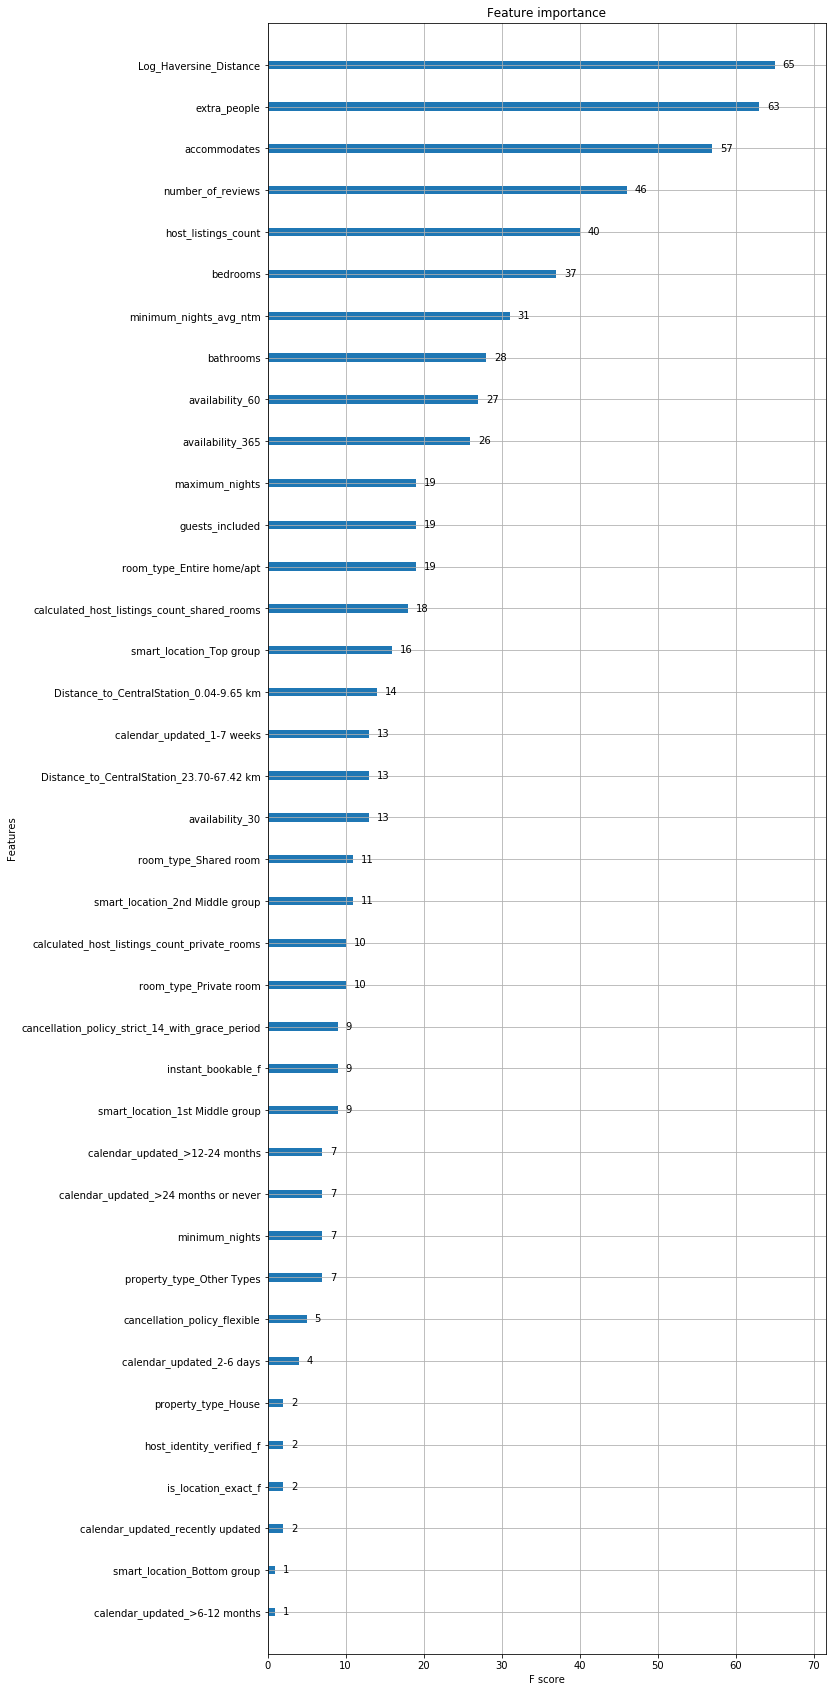

In [72]:
## Feature importance
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,30))
plot_importance(xgb, ax=ax)

As we can see, those features that mostly affect the rental price prediction would be:
* 'Log_Haversine_Distance': which is the distance of the listed property to Sydney central station
* 'extra_people'
* 'accommodates'
* 'number of reviews'
* 'host_listings_count'
* 'bedrooms'

Text(0, 0.5, 'Density')

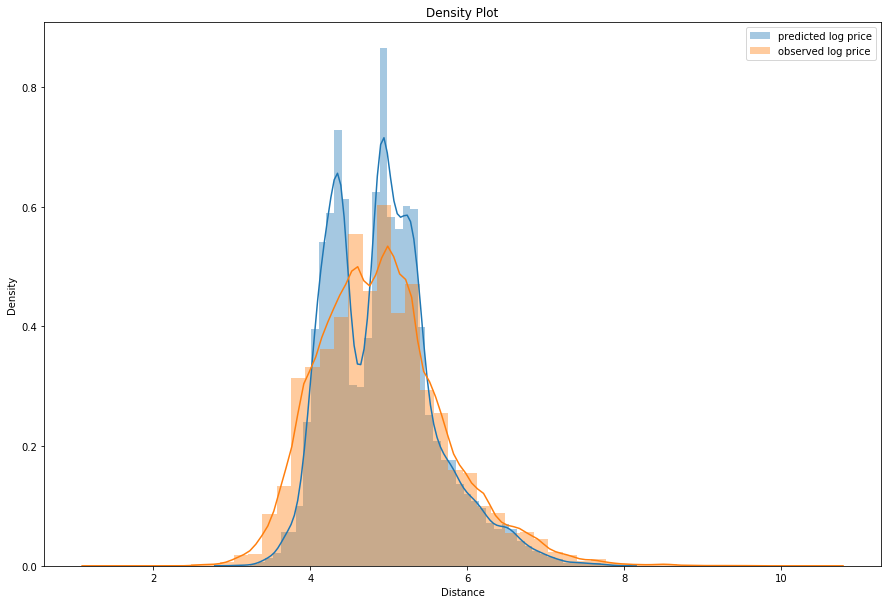

In [73]:
# Visualize distribution of log rental price
plt.figure(figsize=(15,10))
sns.distplot(logprice_pred)
sns.distplot(tar_log)
plt.title('Density Plot')
plt.legend(labels=["predicted log price", "observed log price"])
plt.xlabel('Distance')
plt.ylabel('Density')

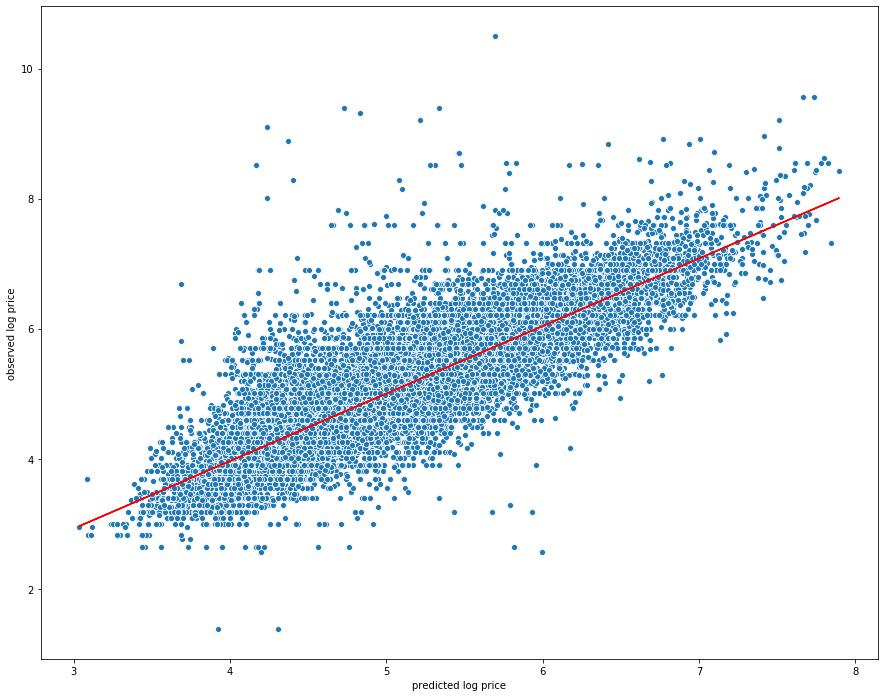

In [172]:
# Scatterplot of log price
plt.figure(figsize=(15,12))
sns.scatterplot(x = logprice_pred, y = tar_log["price"])
plt.xlabel("predicted log price")
plt.ylabel("observed log price")

## add regression line manually
m, b = np.polyfit(logprice_pred, tar_log["price"], 1) #obtain m (slope) and b(intercept) of linear regression line
plt.plot(logprice_pred, m*logprice_pred+b, color='red')

As we can see from above that there is a strongly linear correlated relationship. And the Pearson's correlation can be estimated at:

In [179]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
print("Pearson Correlation: {}".format(pearsonr(logprice_pred, tar_log["price"])[0]))
print("R squared: {}".format(r2_score(tar_log["price"],logprice_pred)))

Pearson Correlation: 0.8519649905580591
R squared: 0.7248621452987566


Hence, our predicted results seem reasonable. Here below is the basic summary of our prediction

In [201]:
## Summary statistic
price_predicted = np.exp(logprice_pred)
price_summary = pd.DataFrame([list(price_predicted), list(tar["price"])], 
                             index=["predicted price", "observed price"]).T
price_summary.describe()

,predicted price,observed price
count,38075.000000,38075.000000
mean,176.516556,205.835351
std,172.602332,389.216801
min,20.862516,4.000000
25%,79.401684,75.000000
50%,134.655548,130.000000
75%,198.705505,210.000000
max,2689.312500,36128.000000
